#### Import Libraries

In [1]:
## main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

## other
from imblearn.over_sampling import SMOTE

## skelarn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## skelarn -- models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## sklearn -- metrics
from sklearn.metrics import f1_score, confusion_matrix, classification_report

## sklearn -- tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Read the Dataset

In [2]:
## Read the Dataset
TRAIN_PATH = os.path.join(os.getcwd(), 'Churn_Modelling.csv')
df = pd.read_csv(TRAIN_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Drop first 3 features
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
## stats
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### EDA

In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
## Geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
## Gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
## Taregt
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Data Viz & Handling Outliers

* Univariate Viz

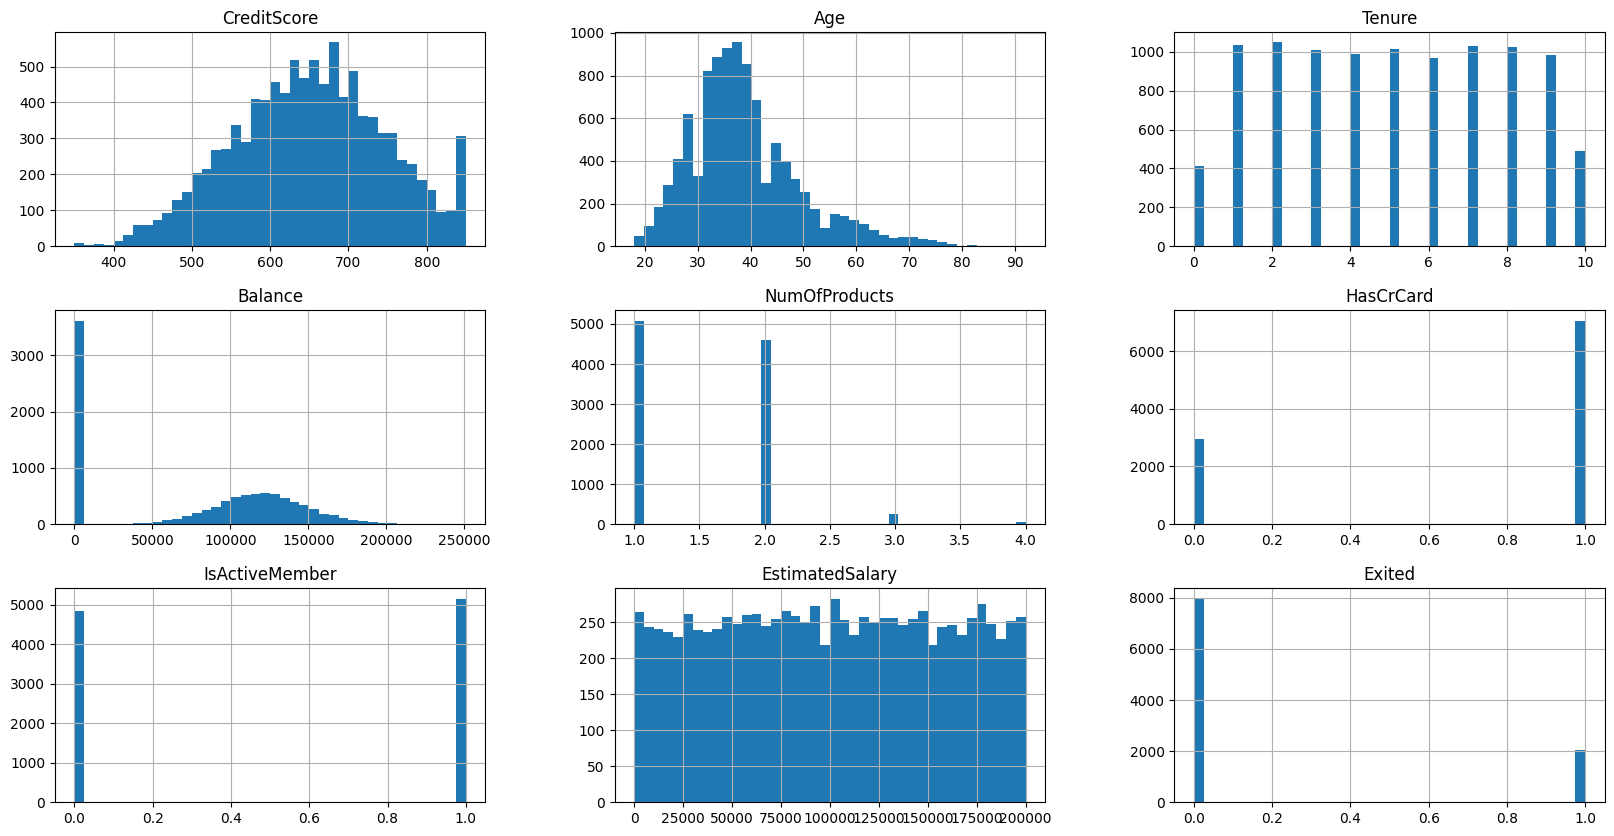

In [12]:
## Numerical
df.hist(bins=40, figsize=(20, 10))
plt.show()

In [13]:
## Filtering using Age Feature using threshold
df.drop(index=df[df['Age'] > 80].index.tolist(), axis=0, inplace=True)

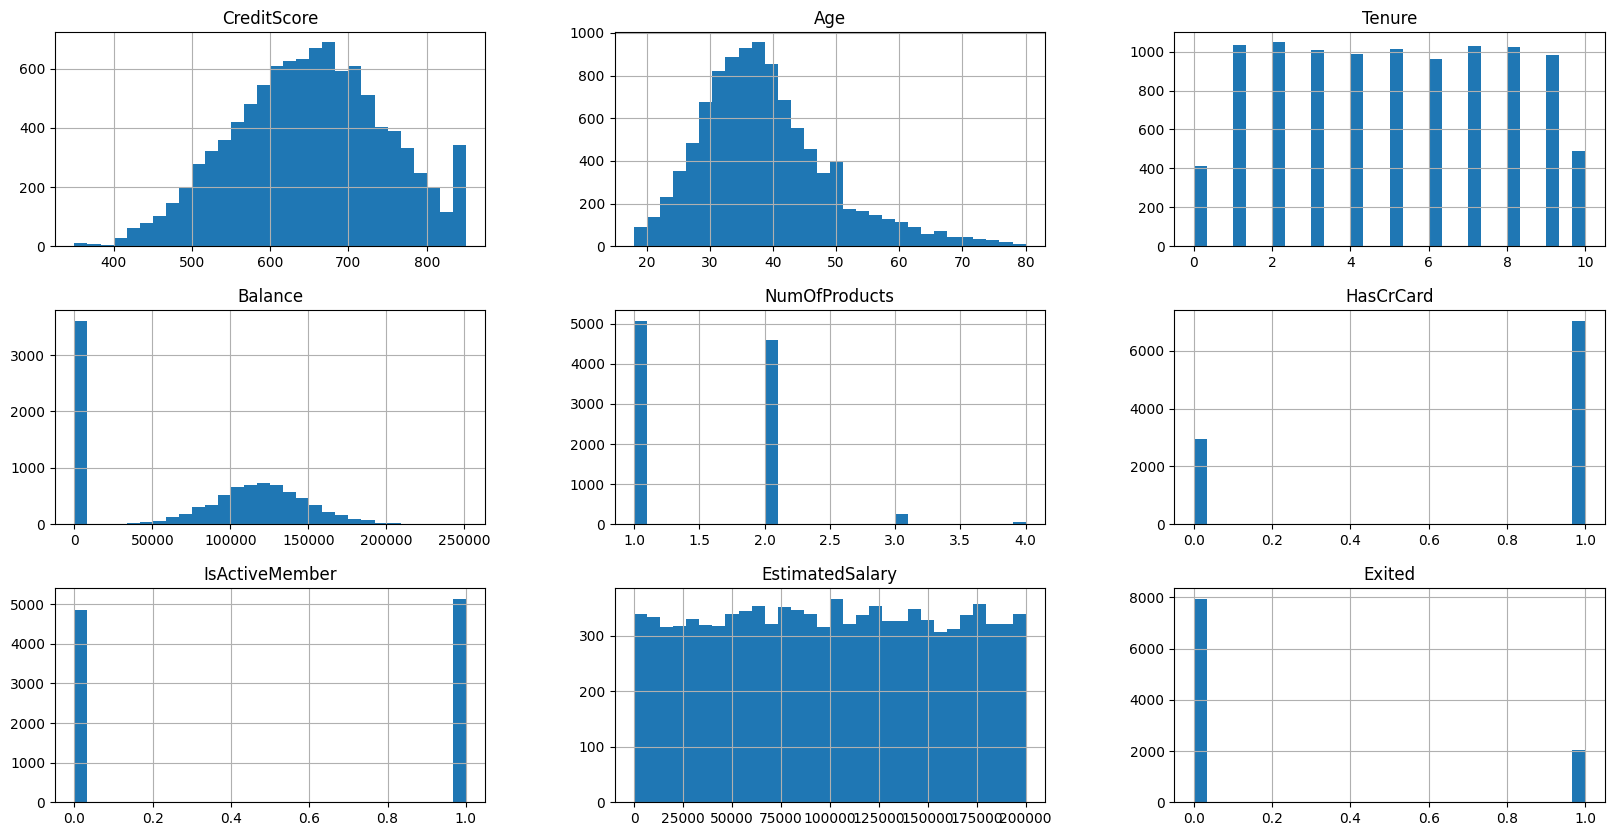

In [14]:
## Numerical distr after above cell
df.hist(bins=30, figsize=(20, 10))
plt.show()

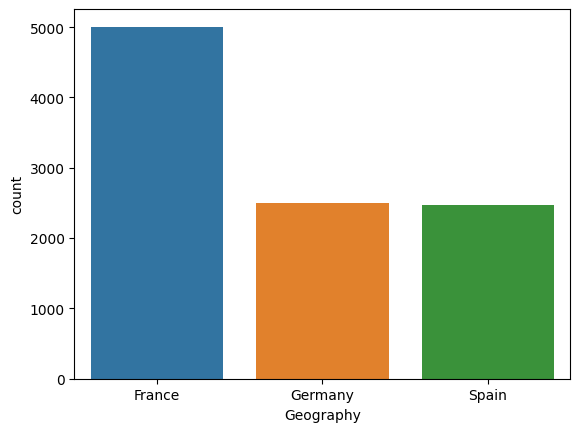

In [15]:
## countplot
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

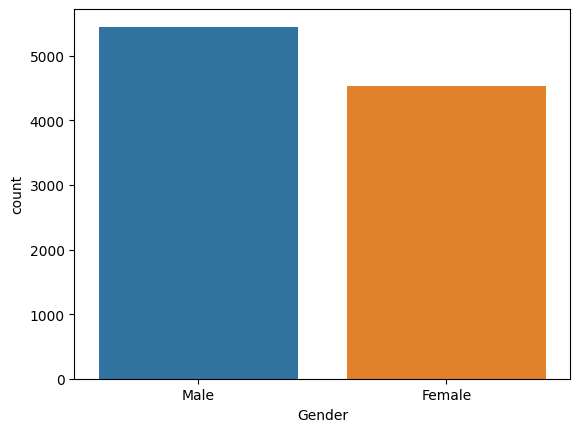

In [16]:
## counplot for Gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

<Axes: ylabel='EstimatedSalary'>

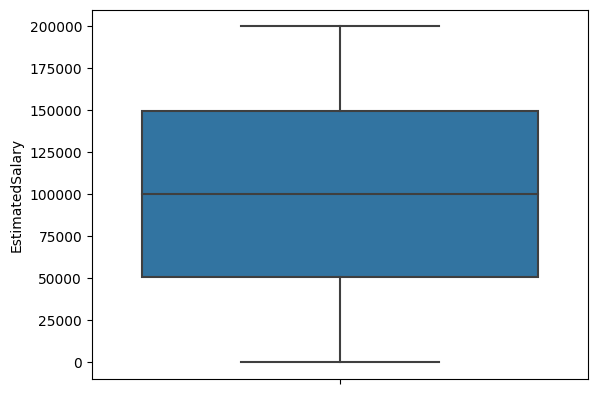

In [17]:
## Boxplot for (EstimatedSalary)
sns.boxplot(data=df, y='EstimatedSalary')

<Axes: xlabel='Exited', ylabel='count'>

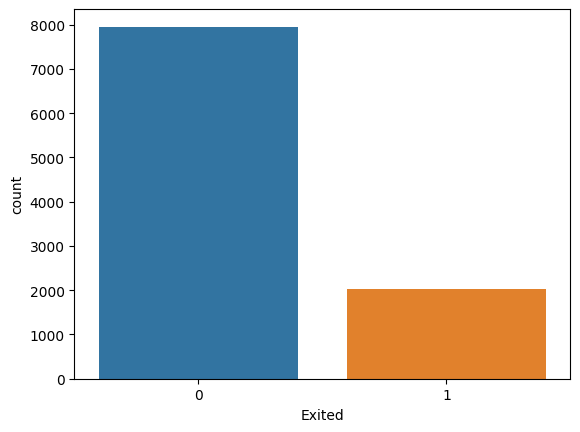

In [18]:
## countplot for Exited
sns.countplot(data=df, x='Exited')  ## title, xlabel, ylabel

* Bivariate Viz

In [19]:
## Averge salary per Gender
df[['Gender', 'EstimatedSalary']].groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

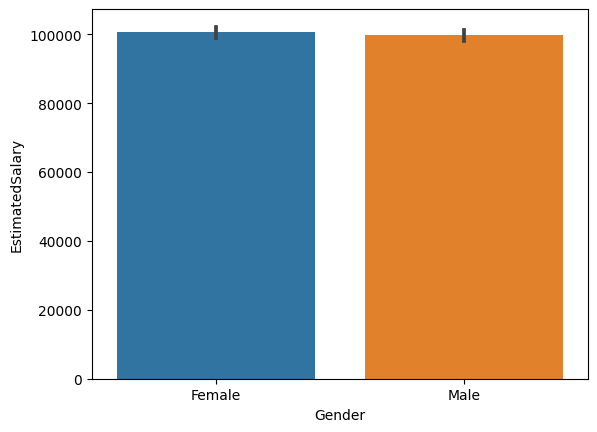

In [20]:
## using seaborn
sns.barplot(data=df, y='EstimatedSalary', x='Gender', estimator='mean')

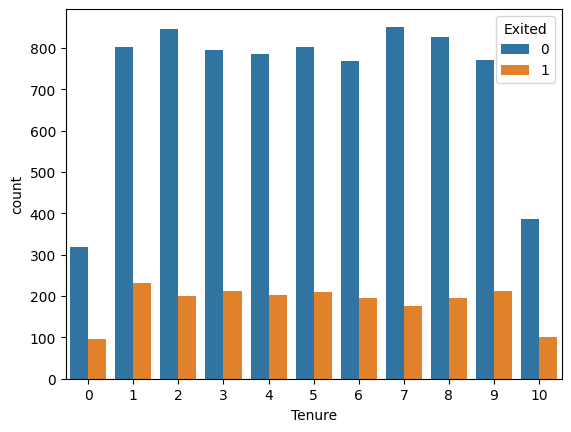

In [21]:
## Realation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')  ## labels, title
plt.show()

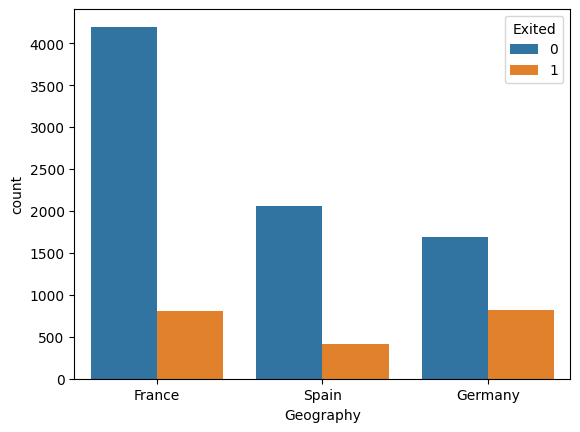

In [22]:
## Geography with Exited
sns.countplot(data=df,x='Geography', hue='Exited')  ## labels, titles
plt.show()

#### Split to train and test

In [23]:
## To features and target
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

## Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7990, 10)
y_train.shape 	 (7990,)
******************************
X_test.shape 	 (1998, 10)
y_test.shape 	 (1998,)


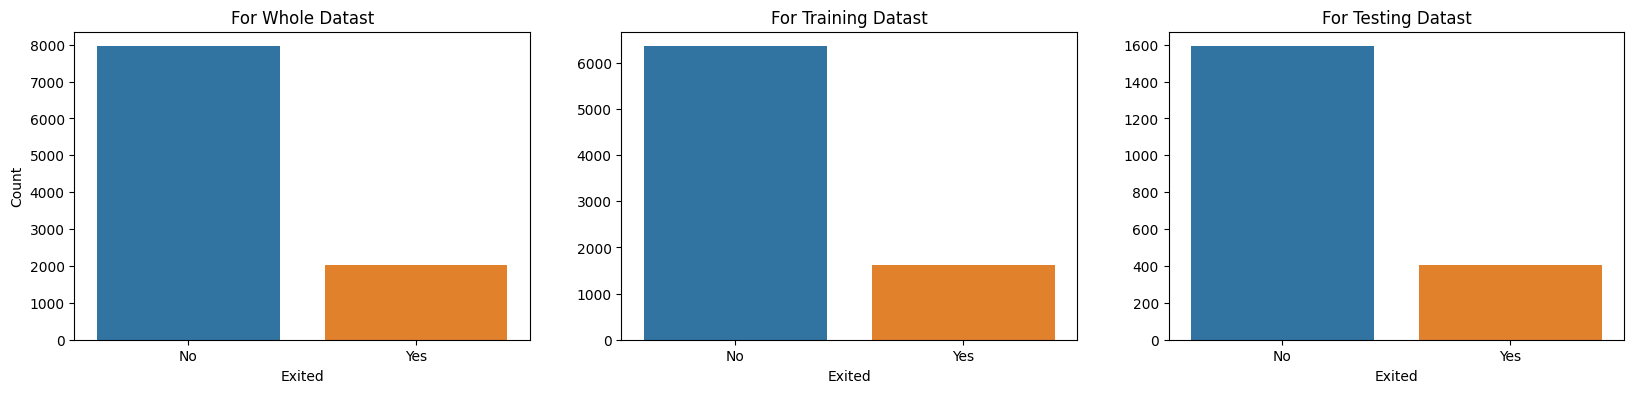

In [24]:
## plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

## Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Data Preprocessing

In [25]:
## Slice the lists
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Gender', 'Geography']

ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))

In [26]:
## Pipeline

## Numerical: num_cols --> Imputing using median, and standardscaler
## Categorical: categ_cols ---> Imputing using mode, and OHE
## Ready_cols ---> Imputing mode

## For Numerical
num_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(num_cols)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                    ])


## For Categorical
categ_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(categ_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('ohe', OneHotEncoder(drop='first', sparse_output=False))
                    ])


## For ready cols
ready_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(ready_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent'))
                    ])



## combine all
all_pipeline = FeatureUnion(transformer_list=[
                                    ('numerical', num_pipeline),
                                    ('categorical', categ_pipeline),
                                    ('ready', ready_pipeline)
                                ])

## apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [27]:
## Check train
X_train_final.shape, y_train.shape

((7990, 11), (7990,))

In [28]:
## Check test
X_test_final.shape, y_test.shape

((1998, 11), (1998,))

#### Deal with imbalnced dataset

In [29]:
arr = np.array([0, 0, 0, 2, 2, 3, 2, 5, 4])
np.bincount(arr)

array([3, 0, 3, 1, 1, 1], dtype=int64)

In [30]:
## 1. prepare class_weights for solving imbalance dataset
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)  ## normalizing
vals_count

dict_weights = {}
for i in range(2):  ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

## to model
dict_weights

{0: 0.20387984981226537, 1: 0.7961201501877346}

In [31]:
# arr = np.array([0, 0, 0, 0, 1, 2, 2, 3, 2, 5, 4])
# arr = 1 - (np.bincount(arr) / len(arr))
# arr = arr / np.sum(arr)
# arr

In [32]:
y_train.value_counts()

Exited
0    6361
1    1629
Name: count, dtype: int64

In [33]:
## 2. Using SMOTE for over sampling
over = SMOTE(sampling_strategy=0.7)
X_train_resmapled, y_train_resampled = over.fit_resample(X_train_final, y_train)

------

In [34]:
## Create a folder for the models
MODELS_FOLDER = os.makedirs(os.path.join(os.getcwd(), 'models'), exist_ok=True)

#### Building Models
> Let's consider the evaluation metric to be f1_score

1. Using Logistic Regression

In [35]:
## 1. Using logisit -- without considering the imabalancing data
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

## Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset is 30.965
The f1_score using Logistic model for Testing Dataset is 37.500


In [36]:
## 2. Using logisit -- with considering the imabalancing data using class_weights
log_clf = LogisticRegression(C=1.5, class_weight=dict_weights)
log_clf.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

## Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with class_weigths is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with class_weigths is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with class_weigths is 49.814
The f1_score using Logistic model for Testing Dataset with class_weigths is 49.915


In [37]:
## 3. Using logisit -- with considering the imabalancing data using oversampled data (SMOTE)
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

## Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with SMOTE is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with SMOTE is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with SMOTE is 49.729
The f1_score using Logistic model for Testing Dataset with SMOTE is 50.522


In [38]:
## dump model
joblib.dump(log_clf, 'models/logisic_model_with_smote.pkl')

['models/logisic_model_with_smote.pkl']

2. RandomForest

In [39]:
## Using RF -- With class_weights
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)
forst_clf.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_foerst = forst_clf.predict(X_test_final)

## Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with class_weights is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with class_weights is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with class_weights is 60.226
The f1_score using RF model for Testing Dataset with class_weights is 58.084


In [40]:
## Using RF -- With SMOTE
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_foerst = forst_clf.predict(X_test_final)

## Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with SMOTE is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with SMOTE is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with SMOTE is 61.321
The f1_score using RF model for Testing Dataset with SMOTE is 59.623


In [41]:
## Dump Model
joblib.dump(forst_clf, 'models/forest_model_with_smote.pkl')

['models/forest_model_with_smote.pkl']

#### RF Tuning

* GridSearchCV for tuning

In [42]:
## using GridSearchCV with class_weights
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, 
                                   random_state=45, class_weight=dict_weights)

## Your space to search
params_best_grid = {
            'n_estimators': np.arange(50, 400, 50),
            'max_depth': np.arange(2, 10, 2)
}

## Intitialize GridSerach
grid_forest = GridSearchCV(estimator=forst_clf, 
                           param_grid=params_best_grid, cv=5, scoring='f1', verbose=4)

## Fitting
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END ......max_depth=2, n_estimators=50;, score=0.505 total time=   0.2s
[CV 2/5] END ......max_depth=2, n_estimators=50;, score=0.524 total time=   0.2s
[CV 3/5] END ......max_depth=2, n_estimators=50;, score=0.517 total time=   0.2s
[CV 4/5] END ......max_depth=2, n_estimators=50;, score=0.552 total time=   0.2s
[CV 5/5] END ......max_depth=2, n_estimators=50;, score=0.547 total time=   0.2s
[CV 1/5] END .....max_depth=2, n_estimators=100;, score=0.507 total time=   0.5s
[CV 2/5] END .....max_depth=2, n_estimators=100;, score=0.522 total time=   0.4s
[CV 3/5] END .....max_depth=2, n_estimators=100;, score=0.523 total time=   0.5s
[CV 4/5] END .....max_depth=2, n_estimators=100;, score=0.538 total time=   0.4s
[CV 5/5] END .....max_depth=2, n_estimators=100;, score=0.548 total time=   0.4s
[CV 1/5] END .....max_depth=2, n_estimators=150;, score=0.522 total time=   0.6s
[CV 2/5] END .....max_depth=2, n_estimators=150

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.20387984981226537,
                                                            1: 0.7961201501877346},
                                              max_depth=5, n_estimators=150,
                                              random_state=45),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
             scoring='f1', verbose=4)

In [43]:
## The best score according to your scoring
grid_forest.best_score_

0.6189126301538772

In [ ]:
## The best combination of what you search in
grid_forest.best_params_

In [44]:
## The forest after tuning
forest_tuned = grid_forest.best_estimator_   ## The best model contains the best params you search in
forest_tuned.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_foerst_tuned = forest_tuned.predict(X_test_final)

## Using f1_score
score_train_forest_tuned = f1_score(y_train, y_pred_train_forest_tuned)
score_test_forest_tuned = f1_score(y_test, y_pred_test_foerst_tuned)

print(f'The f1_score using tuned RF model for Training Dataset with class_weigths is {score_train_forest_tuned*100:.3f}')
print(f'The f1_score using tuned RF model for Testing Dataset with class_weigths is {score_test_forest_tuned*100:.3f}')

The f1_score using tuned RF model for Training Dataset with class_weigths is 68.187
The f1_score using tuned RF model for Testing Dataset with class_weigths is 61.002


In [46]:
## Downlaod it if you are satisifed with the above model
joblib.dump(forest_tuned, 'models/forest_tuned_with_weights.pkl')

['models/forest_tuned_with_weights.pkl']

* RandomizedSearchCV for tuning

In [47]:
## Using RandomizedSearchCV with RF with class_weights
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, 
                                   random_state=45, class_weight=dict_weights)

## params for forest
params_best_forest = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(2, 10, 2)
}
random_forest = RandomizedSearchCV(estimator=forst_clf, param_distributions=params_best_forest, cv=5, scoring='f1', 
                                   n_iter=10, verbose=4)
random_forest.fit(X_train_final, y_train)

[CV 2/5] END .....max_depth=6, n_estimators=200;, score=0.595 total time=   1.6s
[CV 3/5] END .....max_depth=6, n_estimators=200;, score=0.580 total time=   1.4s
[CV 4/5] END .....max_depth=6, n_estimators=200;, score=0.627 total time=   1.6s
[CV 5/5] END .....max_depth=6, n_estimators=200;, score=0.621 total time=   1.4s
[CV 1/5] END .....max_depth=2, n_estimators=200;, score=0.526 total time=   0.9s
[CV 2/5] END .....max_depth=2, n_estimators=200;, score=0.545 total time=   0.9s
[CV 3/5] END .....max_depth=2, n_estimators=200;, score=0.517 total time=   0.8s
[CV 4/5] END .....max_depth=2, n_estimators=200;, score=0.561 total time=   0.8s
[CV 5/5] END .....max_depth=2, n_estimators=200;, score=0.571 total time=   0.8s
[CV 1/5] END .....max_depth=2, n_estimators=300;, score=0.529 total time=   1.3s
[CV 2/5] END .....max_depth=2, n_estimators=300;, score=0.547 total time=   1.1s
[CV 3/5] END .....max_depth=2, n_estimators=300;, score=0.524 total time=   1.1s
[CV 4/5] END .....max_depth=

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 0.20387984981226537,
                                                                  1: 0.7961201501877346},
                                                    max_depth=5,
                                                    n_estimators=150,
                                                    random_state=45),
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 200, 300, 400])},
                   scoring='f1', verbose=4)

In [48]:
random_forest.best_params_

{'n_estimators': 200, 'max_depth': 8}

In [49]:
forest_tuned_2 = random_forest.best_estimator_  ## The best model with best params you search in using RandomizedSearchCV
forest_tuned_2.fit(X_train_final, y_train)

RandomForestClassifier(class_weight={0: 0.20387984981226537,
                                     1: 0.7961201501877346},
                       max_depth=8, n_estimators=200, random_state=45)

In [50]:
## Download if if you are satisfied ...
joblib.dump(forest_tuned, 'models/forest_random_tuned_with_weights.pkl')

['models/forest_random_tuned_with_weights.pkl']

3. KNN

In [51]:
## Using knn with SMOTE
knn_clf = KNeighborsClassifier(n_neighbors=15, p=1, metric='minkowski')
knn_clf.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_knn = knn_clf.predict(X_train_final)
y_pred_test_knn = knn_clf.predict(X_test_final)

## Using f1_score
score_train_knn = f1_score(y_train, y_pred_train_knn)
score_test_knn = f1_score(y_test, y_pred_test_knn)

print(f'The f1_score using KNN model for Training Dataset with SMOTE is {score_train_knn*100:.3f}')
print(f'The f1_score using KNN model for Testing Dataset with SMOTE is {score_test_knn*100:.3f}')

The f1_score using KNN model for Training Dataset with SMOTE is 66.282
The f1_score using KNN model for Testing Dataset with SMOTE is 54.610


In [52]:
## Tuning KNN using GridSearchCV with SMOTE
knn_clf = KNeighborsClassifier(n_neighbors=15, p=1, metric='minkowski')
params_best_knn = {
    'n_neighbors': np.arange(2, 15, 1),
    'p': [1, 2]
}

grid_knn = GridSearchCV(estimator=knn_clf, param_grid=params_best_knn, cv=5, scoring='f1', verbose=4)
grid_knn.fit(X_train_resmapled, y_train_resampled)

[CV 5/5] END ................n_neighbors=4, p=1;, score=0.856 total time=   0.2s
[CV 1/5] END ................n_neighbors=4, p=2;, score=0.785 total time=   0.3s
[CV 2/5] END ................n_neighbors=4, p=2;, score=0.794 total time=   0.2s
[CV 3/5] END ................n_neighbors=4, p=2;, score=0.849 total time=   0.2s
[CV 4/5] END ................n_neighbors=4, p=2;, score=0.861 total time=   0.2s
[CV 5/5] END ................n_neighbors=4, p=2;, score=0.848 total time=   0.2s
[CV 1/5] END ................n_neighbors=5, p=1;, score=0.776 total time=   0.3s
[CV 2/5] END ................n_neighbors=5, p=1;, score=0.796 total time=   0.2s
[CV 3/5] END ................n_neighbors=5, p=1;, score=0.847 total time=   0.3s
[CV 4/5] END ................n_neighbors=5, p=1;, score=0.868 total time=   0.2s
[CV 5/5] END ................n_neighbors=5, p=1;, score=0.853 total time=   0.3s
[CV 1/5] END ................n_neighbors=5, p=2;, score=0.784 total time=   0.2s
[CV 2/5] END ...............

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15, p=1),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]},
             scoring='f1', verbose=4)

In [ ]:
grid_knn.best_params_

In [53]:
## Using the tuned KNN as model
knn_tuned = grid_knn.best_estimator_
knn_tuned.fit(X_train_resmapled, y_train_resampled)


## Predict and evaluate
y_pred_train_knn_tuned = knn_tuned.predict(X_train_final)
y_pred_test_knn_tuned = knn_tuned.predict(X_test_final)

## Using f1_score
score_train_knn_tuned = f1_score(y_train, y_pred_train_knn_tuned)
score_test_knn_tuned = f1_score(y_test, y_pred_test_knn_tuned)

print(f'The f1_score using tuned KNN model for Training Dataset with SMOTE is {score_train_knn_tuned*100:.3f}')
print(f'The f1_score using tuned KNN model for Testing Dataset with SMOTE is {score_test_knn_tuned*100:.3f}')

The f1_score using tuned KNN model for Training Dataset with SMOTE is 95.409
The f1_score using tuned KNN model for Testing Dataset with SMOTE is 43.085


In [54]:
## Download if if you are satisfied ...
joblib.dump(knn_tuned, 'models/knn_tuned_with_smote.pkl')

['models/knn_tuned_with_smote.pkl']

---